In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Video_Games_Sales.csv') # as of december 2016
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

## Exploratory Data Analysis (EDA)

In [4]:
# Check missing values
print("Missing Values:")
print(df.isnull().sum())
print("\n" + "="*50 + "\n")

# Missing percentage
missing_percent = (df.isnull().sum() / len(df)) * 100
print("Missing Percentage:")
print(missing_percent[missing_percent > 0].sort_values(ascending=False))

Missing Values:
Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64


Missing Percentage:
User_Count         54.602548
Critic_Count       51.330821
Critic_Score       51.330821
Rating             40.486871
User_Score         40.098092
Developer          39.613613
Year_of_Release     1.608948
Publisher           0.322986
Name                0.011962
Genre               0.011962
dtype: float64


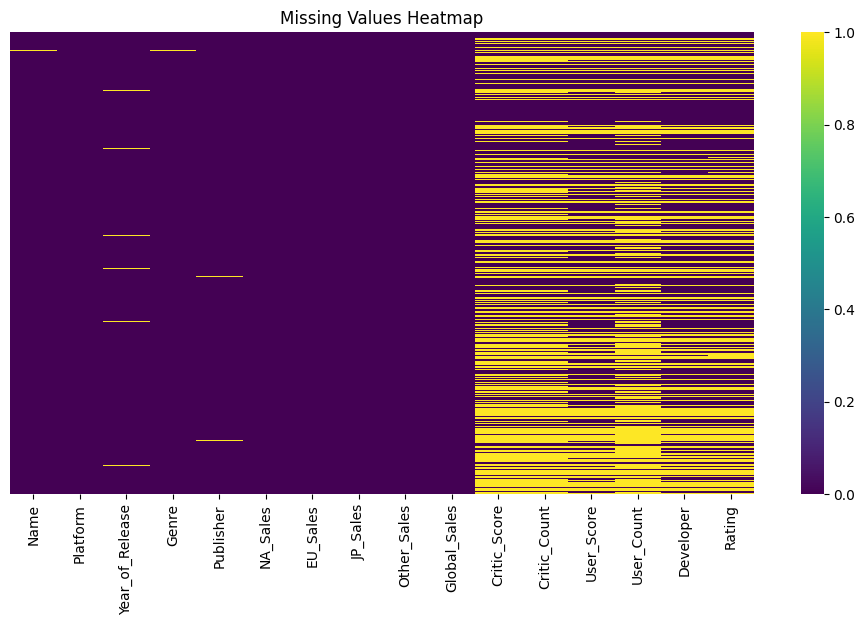

In [5]:
# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

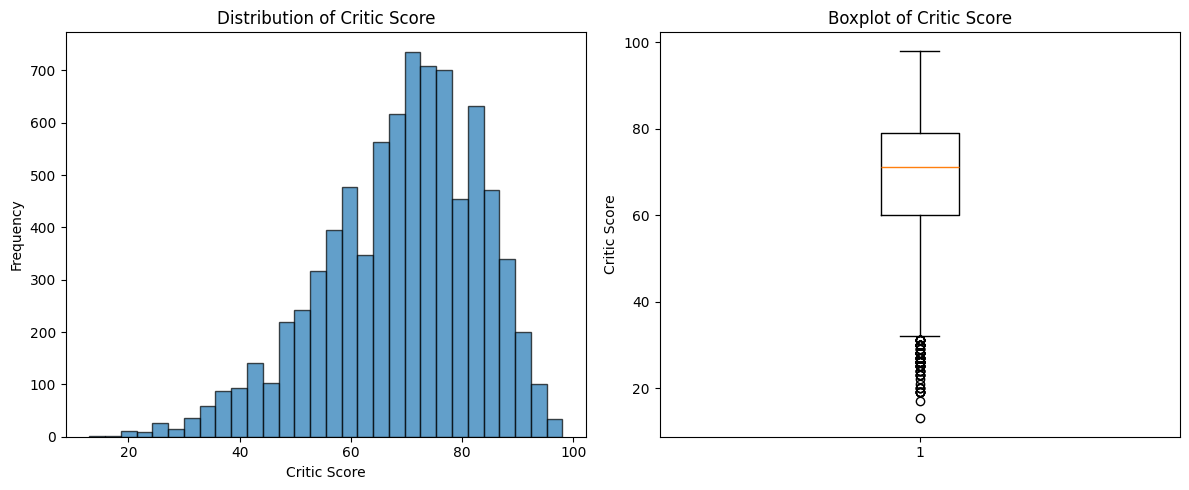

Critic Score Statistics:
count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: Critic_Score, dtype: float64


In [6]:
# Distribution of Critic Score (target variable)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['Critic_Score'].dropna(), bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Critic Score')
plt.ylabel('Frequency')
plt.title('Distribution of Critic Score')

plt.subplot(1, 2, 2)
plt.boxplot(df['Critic_Score'].dropna(), vert=True)
plt.ylabel('Critic Score')
plt.title('Boxplot of Critic Score')

plt.tight_layout()
plt.show()

print(f"Critic Score Statistics:")
print(df['Critic_Score'].describe())

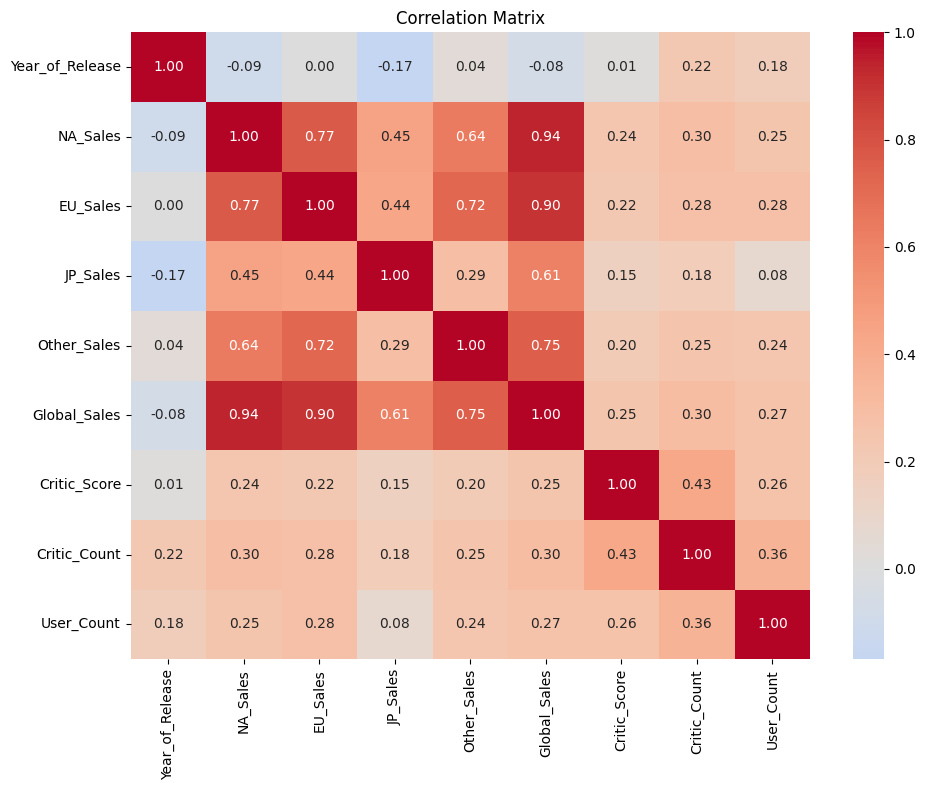

In [7]:
# Correlation analysis for numerical features
numerical_cols = ['Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 
                  'Other_Sales', 'Global_Sales', 'Critic_Score', 'Critic_Count', 
                  'User_Count']

plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

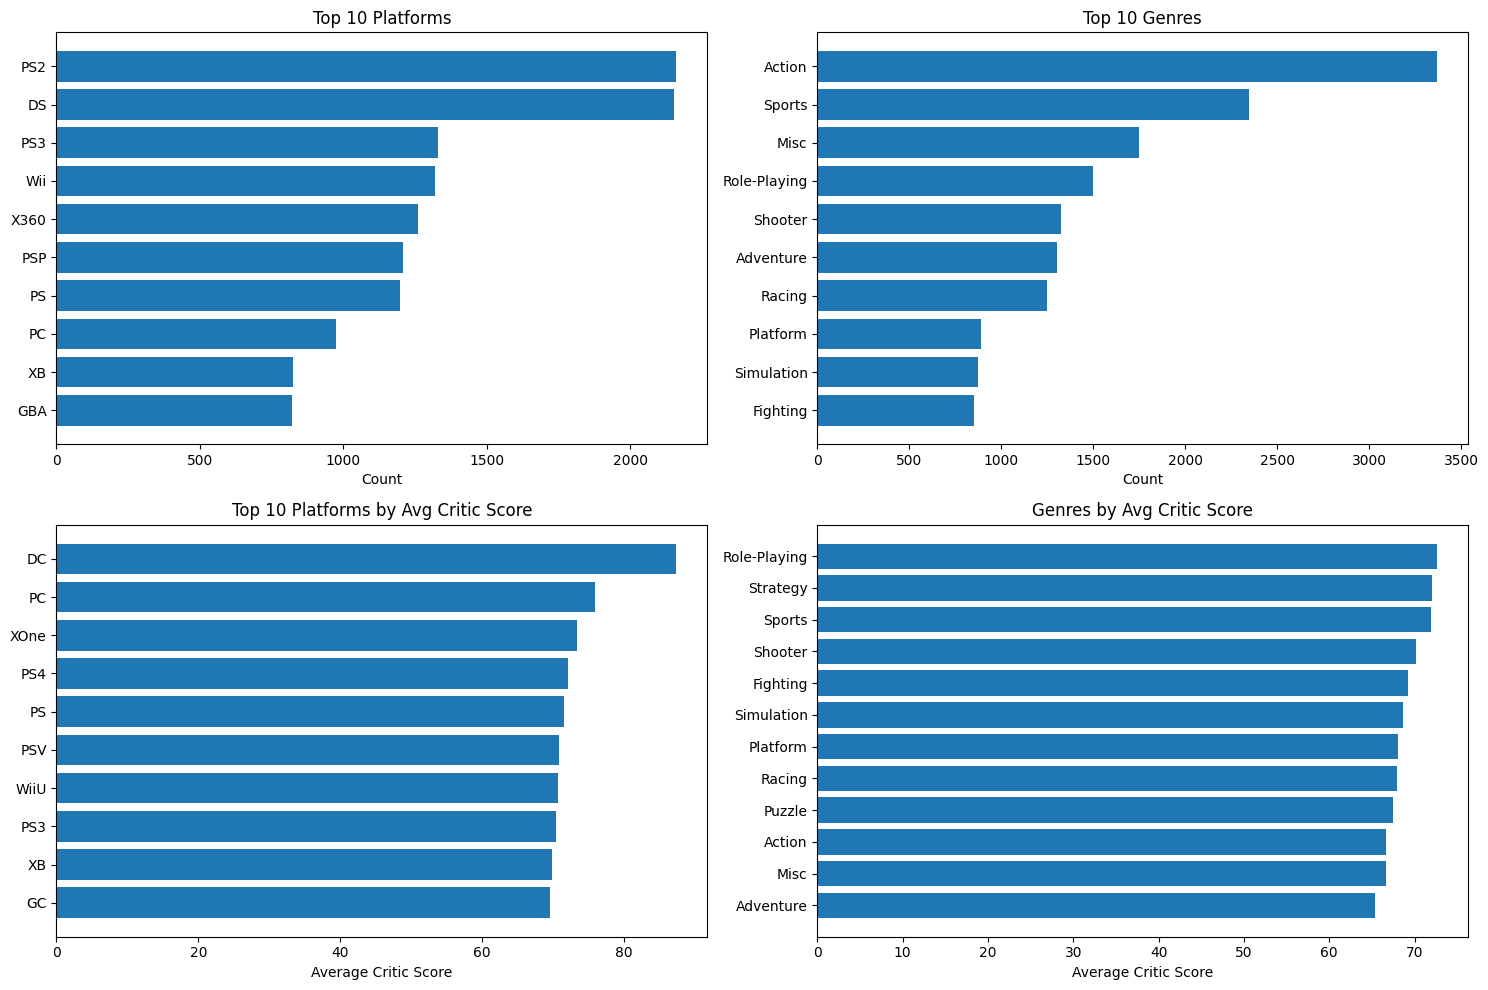

In [8]:
# Top platforms and genres
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Top 10 platforms by count
top_platforms = df['Platform'].value_counts().head(10)
axes[0, 0].barh(top_platforms.index, top_platforms.values)
axes[0, 0].set_xlabel('Count')
axes[0, 0].set_title('Top 10 Platforms')
axes[0, 0].invert_yaxis()

# Top 10 genres by count
top_genres = df['Genre'].value_counts().head(10)
axes[0, 1].barh(top_genres.index, top_genres.values)
axes[0, 1].set_xlabel('Count')
axes[0, 1].set_title('Top 10 Genres')
axes[0, 1].invert_yaxis()

# Average Critic Score by Platform (top 10)
avg_score_platform = df.groupby('Platform')['Critic_Score'].mean().sort_values(ascending=False).head(10)
axes[1, 0].barh(avg_score_platform.index, avg_score_platform.values)
axes[1, 0].set_xlabel('Average Critic Score')
axes[1, 0].set_title('Top 10 Platforms by Avg Critic Score')
axes[1, 0].invert_yaxis()

# Average Critic Score by Genre
avg_score_genre = df.groupby('Genre')['Critic_Score'].mean().sort_values(ascending=False)
axes[1, 1].barh(avg_score_genre.index, avg_score_genre.values)
axes[1, 1].set_xlabel('Average Critic Score')
axes[1, 1].set_title('Genres by Avg Critic Score')
axes[1, 1].invert_yaxis()

plt.tight_layout()
plt.show()

## Data Preprocessing and Handling Missing Values

In [9]:
# Create a copy for preprocessing
df_clean = df.copy()

# Since we're predicting Critic_Score, we need rows where Critic_Score is not null
print(f"Original dataset size: {len(df_clean)}")
df_clean = df_clean[df_clean['Critic_Score'].notna()]
print(f"Dataset size after removing null Critic_Score: {len(df_clean)}")

# Handle missing values in other columns
# For Year_of_Release - fill with median or mode
df_clean['Year_of_Release'].fillna(df_clean['Year_of_Release'].median(), inplace=True)

# For User_Score - convert 'tbd' to NaN if exists, then fill with median
if df_clean['User_Score'].dtype == 'object':
    df_clean['User_Score'] = pd.to_numeric(df_clean['User_Score'], errors='coerce')
df_clean['User_Score'].fillna(df_clean['User_Score'].median(), inplace=True)

# For Critic_Count, User_Count - fill with median
df_clean['Critic_Count'].fillna(df_clean['Critic_Count'].median(), inplace=True)
df_clean['User_Count'].fillna(df_clean['User_Count'].median(), inplace=True)

# For categorical columns - fill with mode or 'Unknown'
df_clean['Publisher'].fillna('Unknown', inplace=True)
df_clean['Developer'].fillna('Unknown', inplace=True)
df_clean['Rating'].fillna('Unknown', inplace=True)

print("\nMissing values after handling:")
print(df_clean.isnull().sum())

Original dataset size: 16719
Dataset size after removing null Critic_Score: 8137

Missing values after handling:
Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64


## Feature Engineering

In [10]:
# Feature Engineering
# 1. Total Sales per Region Ratio
df_clean['NA_Sales_Ratio'] = df_clean['NA_Sales'] / (df_clean['Global_Sales'] + 0.001)
df_clean['EU_Sales_Ratio'] = df_clean['EU_Sales'] / (df_clean['Global_Sales'] + 0.001)
df_clean['JP_Sales_Ratio'] = df_clean['JP_Sales'] / (df_clean['Global_Sales'] + 0.001)

# 2. Game Age (years from release to 2016)
df_clean['Game_Age'] = 2016 - df_clean['Year_of_Release']

# 3. User-Critic Score Difference
df_clean['User_Critic_Diff'] = abs(df_clean['User_Score'] * 10 - df_clean['Critic_Score'])

# 4. Review Coverage (proportion of critics who reviewed)
df_clean['Review_Coverage'] = df_clean['Critic_Count'] / (df_clean['Critic_Count'].max() + 1)

# 5. Sales per Critic ratio
df_clean['Sales_per_Review'] = df_clean['Global_Sales'] / (df_clean['Critic_Count'] + 1)

# 6. Is Nintendo Game?
df_clean['Is_Nintendo'] = (df_clean['Publisher'] == 'Nintendo').astype(int)

# 7. Platform generation (rough grouping)
old_gen = ['NES', 'GB', 'SNES', 'GEN', 'N64', 'PS', 'SAT', '2600', 'GBA', 'DC']
mid_gen = ['PS2', 'XB', 'GC', 'DS', 'PSP']
current_gen = ['X360', 'PS3', 'Wii', '3DS', 'PSV', 'WiiU']
new_gen = ['PS4', 'XOne', 'PC']

df_clean['Platform_Gen'] = df_clean['Platform'].apply(
    lambda x: 'Old' if x in old_gen else (
        'Mid' if x in mid_gen else (
            'Current' if x in current_gen else 'New'
        )
    )
)

print("Feature Engineering Complete!")
print(f"New features added: {len(df_clean.columns) - len(df.columns)}")
print(df_clean.head())

Feature Engineering Complete!
New features added: 9
                    Name Platform  Year_of_Release     Genre Publisher  \
0             Wii Sports      Wii           2006.0    Sports  Nintendo   
2         Mario Kart Wii      Wii           2008.0    Racing  Nintendo   
3      Wii Sports Resort      Wii           2009.0    Sports  Nintendo   
6  New Super Mario Bros.       DS           2006.0  Platform  Nintendo   
7               Wii Play      Wii           2006.0      Misc  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  ...  Rating  \
0     41.36     28.96      3.77         8.45         82.53  ...       E   
2     15.68     12.76      3.79         3.29         35.52  ...       E   
3     15.61     10.93      3.28         2.95         32.77  ...       E   
6     11.28      9.14      6.50         2.88         29.80  ...       E   
7     13.96      9.18      2.93         2.84         28.92  ...       E   

   NA_Sales_Ratio  EU_Sales_Ratio  JP_Sales_Ratio Ga

## Encoding Categorical Variables

In [11]:
# Select features for modeling
# Drop Name (too unique), and very high cardinality columns like Developer
features_to_drop = ['Name', 'Critic_Score', 'Developer', 'Publisher']

# Categorical columns to encode
categorical_cols = ['Platform', 'Genre', 'Rating', 'Platform_Gen']

# Create a copy for modeling
df_model = df_clean.copy()

# Label encoding for categorical variables with many categories
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_model[col + '_Encoded'] = le.fit_transform(df_model[col].astype(str))
    label_encoders[col] = le

print("Encoding complete!")
print(f"Columns after encoding: {df_model.shape[1]}")

Encoding complete!
Columns after encoding: 29


## Prepare Data for Modeling

In [12]:
# Select final features
feature_cols = ['Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 
                'Global_Sales', 'Critic_Count', 'User_Score', 'User_Count',
                'NA_Sales_Ratio', 'EU_Sales_Ratio', 'JP_Sales_Ratio', 'Game_Age',
                'User_Critic_Diff', 'Review_Coverage', 'Sales_per_Review', 'Is_Nintendo',
                'Platform_Encoded', 'Genre_Encoded', 'Rating_Encoded', 'Platform_Gen_Encoded']

X = df_model[feature_cols]
y = df_model['Critic_Score']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print(f"Number of features: {X_train.shape[1]}")

Training set size: (6509, 21)
Test set size: (1628, 21)
Number of features: 21


## Model Training and Evaluation

### 1. Linear Regression

In [13]:
# Dictionary to store results
results = {}

# 1. Linear Regression
print("Training Linear Regression...")
lr = LinearRegression()

# Cross-validation
cv_scores_lr = cross_val_score(lr, X_train_scaled, y_train, cv=5, 
                                 scoring='neg_mean_squared_error')
cv_rmse_lr = np.sqrt(-cv_scores_lr.mean())

# Train and predict
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Metrics
results['Linear Regression'] = {
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_lr)),
    'MAE': mean_absolute_error(y_test, y_pred_lr),
    'R2': r2_score(y_test, y_pred_lr),
    'CV_RMSE': cv_rmse_lr
}

print(f"Linear Regression - RMSE: {results['Linear Regression']['RMSE']:.4f}, "
      f"R2: {results['Linear Regression']['R2']:.4f}")

Training Linear Regression...
Linear Regression - RMSE: 9.2408, R2: 0.5625


### 2. Polynomial Regression

In [14]:
# 2. Polynomial Regression with degree 2
print("Training Polynomial Regression (degree=2)...")
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

poly_lr = LinearRegression()

# Cross-validation
cv_scores_poly = cross_val_score(poly_lr, X_train_poly, y_train, cv=5, 
                                   scoring='neg_mean_squared_error')
cv_rmse_poly = np.sqrt(-cv_scores_poly.mean())

# Train and predict
poly_lr.fit(X_train_poly, y_train)
y_pred_poly = poly_lr.predict(X_test_poly)

# Metrics
results['Polynomial Regression'] = {
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_poly)),
    'MAE': mean_absolute_error(y_test, y_pred_poly),
    'R2': r2_score(y_test, y_pred_poly),
    'CV_RMSE': cv_rmse_poly
}

print(f"Polynomial Regression - RMSE: {results['Polynomial Regression']['RMSE']:.4f}, "
      f"R2: {results['Polynomial Regression']['R2']:.4f}")

Training Polynomial Regression (degree=2)...
Polynomial Regression - RMSE: 6.8733, R2: 0.7580


### 3. Lasso Regression (L1) with GridSearchCV

In [15]:
# 3. Lasso Regression (L1 Regularization)
print("Training Lasso Regression with GridSearchCV...")
lasso_params = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

lasso = Lasso(max_iter=10000)
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
lasso_grid.fit(X_train_scaled, y_train)

# Best model
best_lasso = lasso_grid.best_estimator_
y_pred_lasso = best_lasso.predict(X_test_scaled)

# Cross-validation score
cv_rmse_lasso = np.sqrt(-lasso_grid.best_score_)

# Metrics
results['Lasso (L1)'] = {
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_lasso)),
    'MAE': mean_absolute_error(y_test, y_pred_lasso),
    'R2': r2_score(y_test, y_pred_lasso),
    'CV_RMSE': cv_rmse_lasso,
    'Best_Alpha': lasso_grid.best_params_['alpha']
}

print(f"Best Alpha: {lasso_grid.best_params_['alpha']}")
print(f"Lasso Regression - RMSE: {results['Lasso (L1)']['RMSE']:.4f}, "
      f"R2: {results['Lasso (L1)']['R2']:.4f}")

Training Lasso Regression with GridSearchCV...
Best Alpha: 0.01
Lasso Regression - RMSE: 9.2427, R2: 0.5624


### 4. Ridge Regression (L2) with GridSearchCV

In [16]:
# 4. Ridge Regression (L2 Regularization)
print("Training Ridge Regression with GridSearchCV...")
ridge_params = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

ridge = Ridge()
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
ridge_grid.fit(X_train_scaled, y_train)

# Best model
best_ridge = ridge_grid.best_estimator_
y_pred_ridge = best_ridge.predict(X_test_scaled)

# Cross-validation score
cv_rmse_ridge = np.sqrt(-ridge_grid.best_score_)

# Metrics
results['Ridge (L2)'] = {
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_ridge)),
    'MAE': mean_absolute_error(y_test, y_pred_ridge),
    'R2': r2_score(y_test, y_pred_ridge),
    'CV_RMSE': cv_rmse_ridge,
    'Best_Alpha': ridge_grid.best_params_['alpha']
}

print(f"Best Alpha: {ridge_grid.best_params_['alpha']}")
print(f"Ridge Regression - RMSE: {results['Ridge (L2)']['RMSE']:.4f}, "
      f"R2: {results['Ridge (L2)']['R2']:.4f}")

Training Ridge Regression with GridSearchCV...
Best Alpha: 100
Ridge Regression - RMSE: 9.2428, R2: 0.5623


### 5. Random Forest Regressor with GridSearchCV

In [17]:
# 5. Random Forest Regressor
print("Training Random Forest Regressor with GridSearchCV...")
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestRegressor(random_state=42)
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
rf_grid.fit(X_train_scaled, y_train)

# Best model
best_rf = rf_grid.best_estimator_
y_pred_rf = best_rf.predict(X_test_scaled)

# Cross-validation score
cv_rmse_rf = np.sqrt(-rf_grid.best_score_)

# Metrics
results['Random Forest'] = {
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_rf)),
    'MAE': mean_absolute_error(y_test, y_pred_rf),
    'R2': r2_score(y_test, y_pred_rf),
    'CV_RMSE': cv_rmse_rf,
    'Best_Params': rf_grid.best_params_
}

print(f"Best Parameters: {rf_grid.best_params_}")
print(f"Random Forest - RMSE: {results['Random Forest']['RMSE']:.4f}, "
      f"R2: {results['Random Forest']['R2']:.4f}")

Training Random Forest Regressor with GridSearchCV...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest - RMSE: 5.8768, R2: 0.8231


## Model Comparison

In [18]:
# Create comparison DataFrame
comparison_df = pd.DataFrame(results).T

# Select relevant columns
comparison_df = comparison_df[['RMSE', 'MAE', 'R2', 'CV_RMSE']]

# Sort by RMSE (lower is better)
comparison_df = comparison_df.sort_values('RMSE')

print("\n" + "="*80)
print("MODEL PERFORMANCE COMPARISON")
print("="*80)
print(comparison_df.to_string())
print("="*80)

# Display as a styled DataFrame
comparison_df_styled = comparison_df.style.background_gradient(cmap='RdYlGn_r', subset=['RMSE', 'MAE', 'CV_RMSE']) \
                                           .background_gradient(cmap='RdYlGn', subset=['R2']) \
                                           .format(precision=4)

comparison_df_styled


MODEL PERFORMANCE COMPARISON
                           RMSE       MAE        R2   CV_RMSE
Random Forest          5.876814  3.492307  0.823068  5.935396
Polynomial Regression  6.873342  5.016691  0.757976  9.897693
Linear Regression      9.240787  7.010276  0.562537  9.727681
Lasso (L1)             9.242688  7.012553  0.562357  9.725339
Ridge (L2)             9.242827    7.0209  0.562344  9.722368


,RMSE,MAE,R2,CV_RMSE
Random Forest,5.8768,3.4923,0.8231,5.9354
Polynomial Regression,6.8733,5.0167,0.7580,9.8977
Linear Regression,9.2408,7.0103,0.5625,9.7277
Lasso (L1),9.2427,7.0126,0.5624,9.7253
Ridge (L2),9.2428,7.0209,0.5623,9.7224


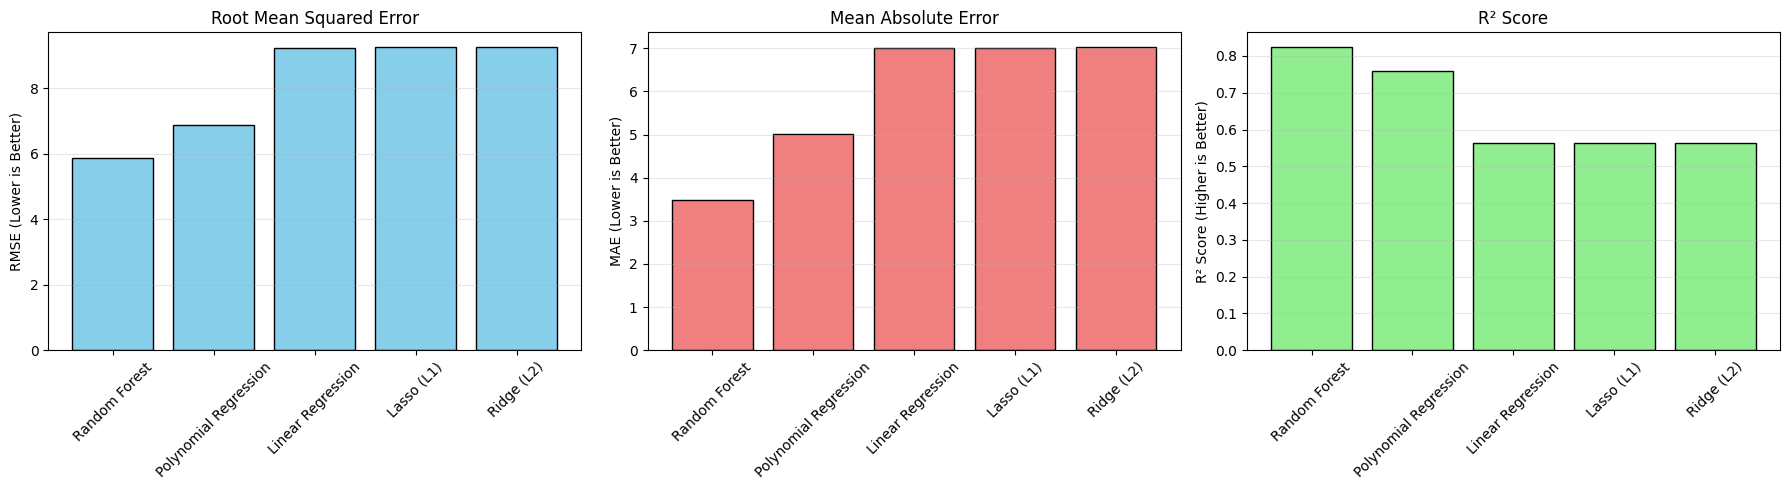

In [19]:
# Visualization of model performance
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# RMSE comparison
axes[0].bar(comparison_df.index, comparison_df['RMSE'], color='skyblue', edgecolor='black')
axes[0].set_ylabel('RMSE (Lower is Better)')
axes[0].set_title('Root Mean Squared Error')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# MAE comparison
axes[1].bar(comparison_df.index, comparison_df['MAE'], color='lightcoral', edgecolor='black')
axes[1].set_ylabel('MAE (Lower is Better)')
axes[1].set_title('Mean Absolute Error')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

# R2 comparison
axes[2].bar(comparison_df.index, comparison_df['R2'], color='lightgreen', edgecolor='black')
axes[2].set_ylabel('R² Score (Higher is Better)')
axes[2].set_title('R² Score')
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

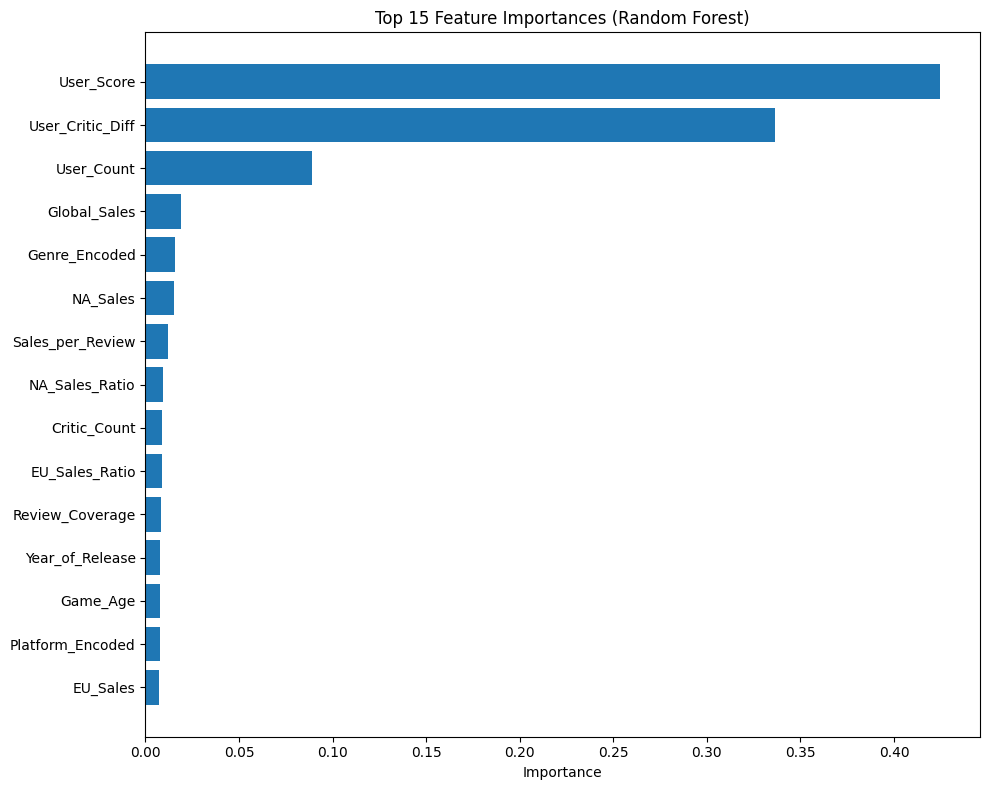


Top 10 Most Important Features:
             Feature  Importance
7         User_Score    0.424698
13  User_Critic_Diff    0.336594
8         User_Count    0.089031
5       Global_Sales    0.019041
18     Genre_Encoded    0.015564
1           NA_Sales    0.015420
15  Sales_per_Review    0.011796
9     NA_Sales_Ratio    0.009544
6       Critic_Count    0.008998
10    EU_Sales_Ratio    0.008707


In [20]:
# Feature importance for Random Forest (best performing model likely)
if 'Random Forest' in results:
    feature_importance = pd.DataFrame({
        'Feature': feature_cols,
        'Importance': best_rf.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    plt.figure(figsize=(10, 8))
    plt.barh(feature_importance['Feature'].head(15), feature_importance['Importance'].head(15))
    plt.xlabel('Importance')
    plt.title('Top 15 Feature Importances (Random Forest)')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    
    print("\nTop 10 Most Important Features:")
    print(feature_importance.head(10))

## Conclusion

The complete machine learning pipeline includes:
1. **Exploratory Data Analysis** - Understanding data distribution and correlations
2. **Data Preprocessing** - Handling missing values and outliers
3. **Feature Engineering** - Creating meaningful features from existing data
4. **Encoding** - Converting categorical variables to numerical
5. **Model Training** - Training 5 different models with cross-validation
6. **Hyperparameter Tuning** - Using GridSearchCV for optimal parameters
7. **Model Comparison** - Evaluating all models on multiple metrics

**Key Metrics:**
- **RMSE** (Root Mean Squared Error): Lower is better - measures average prediction error
- **MAE** (Mean Absolute Error): Lower is better - measures average absolute error
- **R² Score**: Higher is better (max 1.0) - proportion of variance explained
- **CV_RMSE**: Cross-validation RMSE - measures model generalization